In [1]:
import pandas as pd
import warnings 
from sklearn.preprocessing import StandardScaler


x= pd.read_excel('./data.xls')
x=x[x['User Name']=='nglkante']

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#x=x[x['User Name']=='edou_mendy']

In [4]:
def rm_bad_cols(x):
    x = x.dropna(thresh=x.shape[0]*0.5,how='all',axis=1)
    colsize = len(x.columns)
    i=0
    while (i < colsize):
        y=x.iloc[:,[i]]
        l=len(y[y[y.columns[0]] == 0])
        c=len(y[y[y.columns[0]] == '0'])
        #print(x.columns[i],l,len(x),l/len(x))
        if (l/(len(x))) > 0.6 or (c/(len(x))) > 0.6:
            x.__delitem__(y.columns[0])
            colsize = len(x.columns)
            i = i-1
        i = i+1
    return x

In [5]:
xx = rm_bad_cols(x)
xx['Beginning Of Interval'] = pd.to_datetime(xx['Beginning Of Interval'], format='%Y%m%d')

/Users/bobakhossainkhani/opt/anaconda3/envs/Data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
def strip_no_numeric_cols(_df):
    cols = list(_df.select_dtypes(include=['object', 'string']).columns)
    _df = _df.drop(columns=cols)
    return _df

In [7]:
cleaned_xx = strip_no_numeric_cols(xx)
cleaned_xx

,Beginning Of Interval,Followers,Followers Growth
0,2020-01-05,6653215,0.0058
1,2020-01-12,6674227,0.0032
2,2020-01-19,6695382,0.0032
3,2020-01-26,6707574,0.0018
4,2020-02-02,6719138,0.0017
5,2020-02-09,6737460,0.0027
6,2020-02-16,6745849,0.0012
7,2020-02-23,6752960,0.0011
8,2020-03-01,6757554,0.0007
9,2020-03-08,6769050,0.0017


In [8]:
X = cleaned_xx['Beginning Of Interval']
Y1 = cleaned_xx['Followers Growth']
Y2 = cleaned_xx['Followers']

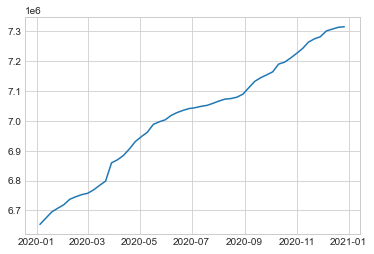

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(X, Y2);

<AxesSubplot:>

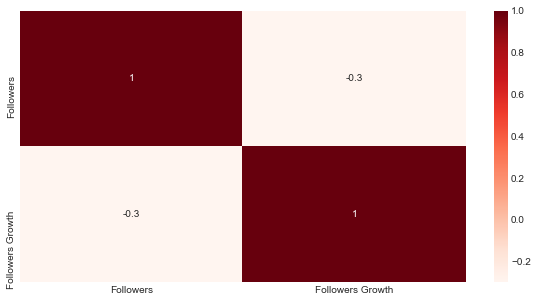

In [10]:
#Using Pearson Correlation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))

cor = xx.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, ax =ax)

In [11]:
Nxx = cleaned_xx.copy()
date_time_colname = 'Beginning Of Interval'
#set index for time series
Nxx.set_index(date_time_colname, inplace = True)
Nxx.head(4)

,Followers,Followers Growth
Beginning Of Interval,,
2020-01-05,6653215,0.0058
2020-01-12,6674227,0.0032
2020-01-19,6695382,0.0032
2020-01-26,6707574,0.0018


In [12]:
def df_to_cnn_rnn_format(df, train_size=0.5, look_back=5, target_column='target', scale_X=True, validatation = False, valid_size = 0.3):
    """
    TODO: output train and test datetime
    Input is a Pandas DataFrame. 
    Output is a np array in the format of (samples, timesteps, features).
    Currently this function only accepts one target variable.

    Usage example:

    # variables
    df = data # should be a pandas dataframe
    test_size = 0.5 # percentage to use for training
    target_column = 'c' # target column name, all other columns are taken as features
    scale_X = False
    look_back = 5 # Amount of previous X values to look at when predicting the current y value
    """
    
    X_valid_reshaped = None
    y_valid_reshaped = None
    
    df = df.copy()

    # Make sure the target column is the last column in the dataframe
    df['target'] = df[target_column] # Make a copy of the target column
    df = df.drop(columns=[target_column]) # Drop the original target column
    
    target_location = df.shape[1] - 1 # column index number of target
    split_index = int(df.shape[0]*train_size) # the index at which to split df into train and test
    
    if(validatation):
        split_index_valid = int(split_index*valid_size) # the index at which to split df into train and test

    
    # ...train
    if(validatation):
        X_train = df.values[:split_index_valid, :target_location]
        X_valid = df.values[split_index_valid:split_index, :target_location]
        y_train = df.values[:split_index, target_location]
        y_valid = df.values[split_index_valid:split_index, target_location]
    else:
        X_train = df.values[:split_index, :target_location]
        y_train = df.values[:split_index, target_location]
        
    index_train = df.index[:split_index]
    
    
    # ...test
    X_test = df.values[split_index:, :target_location] # original is split_index:-1
    y_test = df.values[split_index:, target_location] # original is split_index:-1
    
    index_test = df.index[split_index:-look_back]
    
    
    # Scale the features
    if scale_X:
        scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)
        X_train = scalerX.transform(X_train)
        X_test = scalerX.transform(X_test)
        
        scalery = StandardScaler(with_mean=True, with_std=True).fit(y_train.reshape(-1,1))
        y_train = scalery.transform(y_train.reshape(-1,1))
        y_test = scalery.transform(y_test.reshape(-1,1))
        
        
        
        if(validatation):
            X_valid = scalerX.transform(X_valid)
        
    # Reshape the arrays
    samples = len(X_train) # in this case 217 samples in the training set
    num_features = target_location # All columns before the target column are features

    samples_train = X_train.shape[0] - look_back
    X_train_reshaped = np.zeros((samples_train, look_back, num_features))
    y_train_reshaped = np.zeros((samples_train))

    if(validatation):
        samples_valid = X_valid.shape[0] - look_back
        X_valid_reshaped = np.zeros((samples_valid, look_back, num_features))
        y_valid_reshaped = np.zeros((samples_valid))


    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]

    if(validatation):
        for i in range(samples_valid):
            y_position = i + look_back
            X_valid_reshaped[i] = X_valid[i:y_position]
            y_valid_reshaped[i] = y_valid[y_position]

    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_valid_reshaped, y_valid_reshaped, X_test_reshaped, y_test_reshaped, index_train, index_test, scalerX, scalery

In [13]:
X_train, y_train, X_valid, y_valid, X_test, y_test, index_train, index_test, scalerX, scalary = df_to_cnn_rnn_format(Nxx, train_size=0.7, look_back=3, target_column='Followers', scale_X=True, validatation = False, valid_size = 0.0)
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33, 3, 1)
(33,)
(13, 3, 1)
(13,)


In [14]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam# Train and batch size
import tensorflow as tf





# choose a number of time steps
n_steps_in = 3
n_steps_out = 1
n_features = len(Nxx.columns)-1
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(n_steps_in, n_features)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

#schedule = SGDRScheduler(min_lr=2.3e-6, #1e-5
#                                     max_lr=3.5e-2, # 1e-2
#                                     steps_per_epoch=np.ceil(epoch_size/bs),
#                                     lr_decay=0.9,
#                                     cycle_length=5, # 5
#                                     mult_factor=1.5)

#model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_split=0.2,
#         verbose=1, callbacks=[PlotLossesKeras(), early_stopping_monitor, checkpoint,schedule])


#networkhistory = model.fit(X_train , y_train , epochs=300 , steps_per_epoch=25 , verbose=1, validation_split=0.2 
#                          )#,validation_data=(test_X, test_y)# ,  shuffle=False
    
#model.summary()    

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout, GRU#, CuDNNLSTM
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD, Nadam
from time import time
from livelossplot import PlotLossesKeras
from keras.layers.advanced_activations import LeakyReLU, PReLU


model = Sequential()
model.add(LSTM(4, input_shape=(n_steps_in, n_features), return_sequences=True, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.391))

#1
for _ in range(2):
    model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.04))   

#2
model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.749))

#3
for _ in range(0):
    model.add(Dense(4, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.056))
#3
for _ in range(8):
    model.add(Dense(256, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.212))
#4
for _ in range(1):
    model.add(Dense(64, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.727))

#5
model.add(Dense(32, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.450))

model.add(Dense(1))

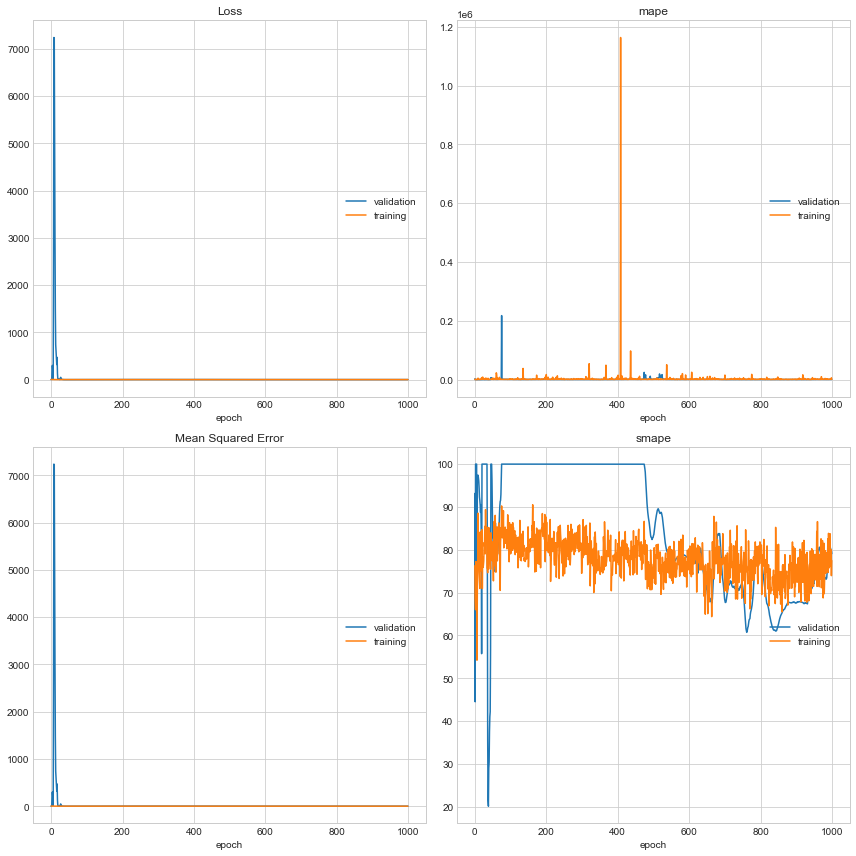

Loss
	validation       	 (min:    0.160, max: 7238.317, cur:    1.018)
	training         	 (min:    0.468, max:    3.536, cur:    0.571)
mape
	validation       	 (min:   51.213, max: 217728.219, cur:  763.572)
	training         	 (min:  200.320, max: 1163546.250, cur: 1231.761)
Mean Squared Error
	validation       	 (min:    0.160, max: 7238.317, cur:    1.018)
	training         	 (min:    0.468, max:    3.536, cur:    0.571)
smape
	validation       	 (min:   20.126, max:  100.000, cur:   79.090)
	training         	 (min:   54.219, max:   90.505, cur:   77.484)

Epoch 01000: val_mape did not improve from 51.21316
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 4)              96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 4)              16        
___________________________

In [16]:
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD, Nadam
from time import time
from livelossplot import PlotLossesKeras
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keijzer import *
"""
Look back , 5
nodes, 35

More only makes the model more complex and harder/slower to train
"""

epochs = 10**3
bs = 256
lr = 1e-1
print(bs)


# 0.05 0.9 0 True
sgd = SGD(lr=0.5, momentum=0.9, decay=0, nesterov=True) # sgd in general yields better results, but needs a lot of tweeking and is slower
adam = Adam(lr=lr)
nadam = Nadam(lr=lr)


# compile & fit
model.compile(optimizer='adam', loss = ['mse'], metrics=[mape, smape, 'mse'])#, ''


early_stopping_monitor = EarlyStopping(patience=5000)

# This is used to save the best model, currently monitoring val_mape
# checkpoint
filepath="models\\LSTM.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mape', verbose=1, save_best_only=True, mode='min')

epoch_size = 16
schedule = SGDRScheduler(min_lr=2.3e-6, #1e-5
                                     max_lr=3.5e-2, # 1e-2
                                     steps_per_epoch=np.ceil(epoch_size/bs),
                                     lr_decay=0.9,
                                     cycle_length=5, # 5
                                     mult_factor=1.5)

model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_split=0.2,
         verbose=1, callbacks=[PlotLossesKeras(), early_stopping_monitor, checkpoint,schedule])
 
print(model.summary())

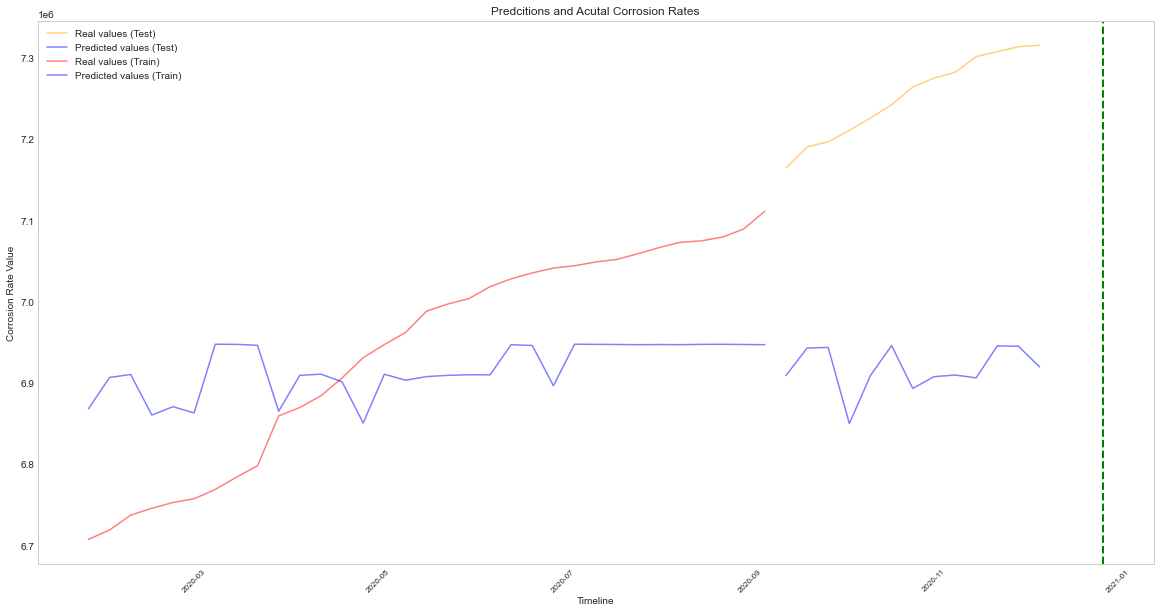

In [17]:
y_pred_test = model.predict(X_test)
y_true_test = y_test.reshape(y_test.shape[0], 1)


alpha = 0.5
target = "Meas_Rate" 
plt.figure(figsize=(20,10))

plt.plot(index_test, scalary.inverse_transform(y_true_test),  color='orange', label='Real values (Test)',alpha=0.5)
plt.plot(index_test, scalary.inverse_transform(y_pred_test),  color='blue', label='Predicted values (Test)',alpha=0.5)


y_pred_train = model.predict(X_train)
y_true_train = y_train.reshape(y_train.shape[0], 1)
plt.plot(index_train[n_steps_in:], scalary.inverse_transform(y_true_train),  color='red', label='Real values (Train)',alpha=0.5)
plt.plot(index_train[n_steps_in:], scalary.inverse_transform(y_pred_train),  color='blue', label='Predicted values (Train)',alpha=0.5)


plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates
plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

plt.title("Comparison", fontsize = 14)

plt.axvline(x = max(Nxx.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Corrosion Rates', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Corrosion Rate Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#plt.savefig('figures/LSTM.jpg', dpi=300)
plt.show()